<a href="https://colab.research.google.com/github/ycarrera01/Proyecto-Final-Modelos-Predictivos/blob/main/Proyecto_Final_An%C3%A1lisis_Predictivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA- Análisis Exploratorio de los Datos**

In [32]:
import pandas as pd
from google.colab import files


In [17]:
uploaded = files.upload()


Saving Dataset.xlsx to Dataset.xlsx


In [77]:
# Verificar el archivo cargado
for filename in uploaded.keys():
    print(f'Archivo cargado: {filename}')
    # Leer el archivo Excel
    data = pd.read_excel(filename)

# Mostrar las primeras filas del archivo cargado
print(data.head())

Archivo cargado: Dataset.xlsx
  Fe.contab.    Material  Total Producido (Unidades)  Total de Producción (Ca)
0 2022-01-03  HEGRFL0824                       32400                     180.0
1 2022-01-04  HEGRFL0824                       38880                     216.0
2 2022-01-05  HEGRFL0824                       45000                     250.0
3 2022-01-06  HEGRFL0824                       51660                     287.0
4 2022-01-07  HEGRFL0824                       45000                     250.0


In [78]:
# Información general sobre el DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Fe.contab.                  1911 non-null   datetime64[ns]
 1   Material                    1911 non-null   object        
 2   Total Producido (Unidades)  1911 non-null   int64         
 3   Total de Producción (Ca)    1911 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 59.8+ KB
None


In [79]:
# Filtrar datos para el SKU 'HEGRFL0824'
material_1_data = data[data['Material'] == 'HEGRFL0824']
material_2_data = data[data['Material'] == 'HSGRFL0655']



In [80]:
# Número de valores únicos en cada columna
print(data.nunique())

Fe.contab.                    959
Material                        2
Total Producido (Unidades)    319
Total de Producción (Ca)      285
dtype: int64


In [81]:
# Verificar los valores nulos
print(data.isnull().sum())

Fe.contab.                    0
Material                      0
Total Producido (Unidades)    0
Total de Producción (Ca)      0
dtype: int64


In [71]:
# Estadísticas descriptivas para el SKU 'HEGRFL0824'
print("Estadísticas descriptivas para el SKU HEGRFL0824:")
print(material_1_data['Total de Producción (Ca)'].describe())

# Estadísticas descriptivas para el SKU 'HSGRFL0655'
print("Estadísticas descriptivas para el SKU HSGRFL0655:")
print(material_2_data['Total de Producción (Ca)'].describe())

Estadísticas descriptivas para el SKU HEGRFL0824:
count    955.000000
mean     280.832635
std       91.773566
min       12.000000
25%      217.000000
50%      285.000000
75%      327.000000
max      696.000000
Name: Total de Producción (Ca), dtype: float64
Estadísticas descriptivas para el SKU HSGRFL0655:
count    956.000000
mean     253.958072
std      110.394579
min        6.000000
25%      164.000000
50%      226.000000
75%      324.250000
max      756.000000
Name: Total de Producción (Ca), dtype: float64


Para el 824 el error estandar representa un 32.68%.
Para el 655 representa el 43.47%.
Y con ésta información se confirma la variabilidad de los pedidos.

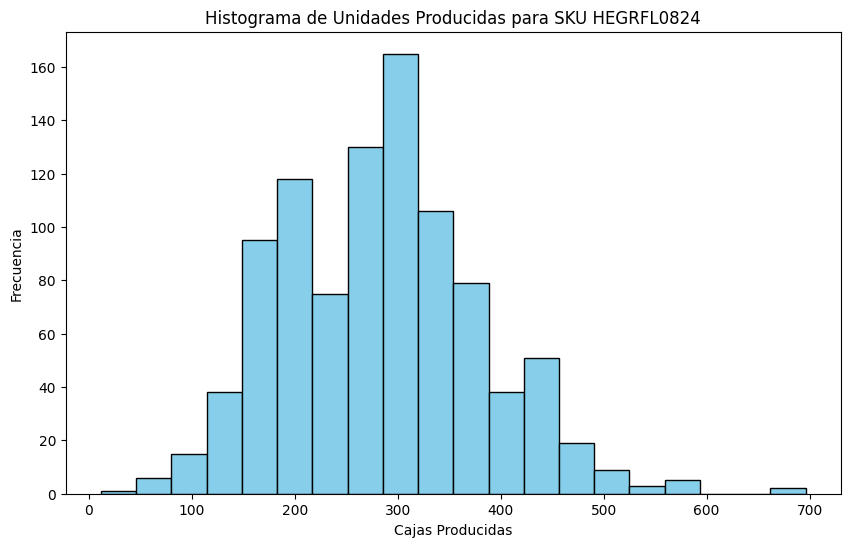

In [36]:
# Histograma para el SKU 'HEGRFL0824'
material_1_data['Total de Producción (Ca)'].plot(kind='hist', bins=20, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Histograma de Unidades Producidas para SKU HEGRFL0824')
plt.xlabel('Cajas Producidas')
plt.ylabel('Frecuencia')
plt.show()

In [37]:
# Calcular el percentil 80 para el SKU 'HEGRFL0824'
percentil_80_1 = material_1_data['Total de Producción (Ca)'].quantile(0.80)
print(f"Percentil 80 para el SKU HEGRFL0824: {percentil_80_1}")

Percentil 80 para el SKU HEGRFL0824: 361.0


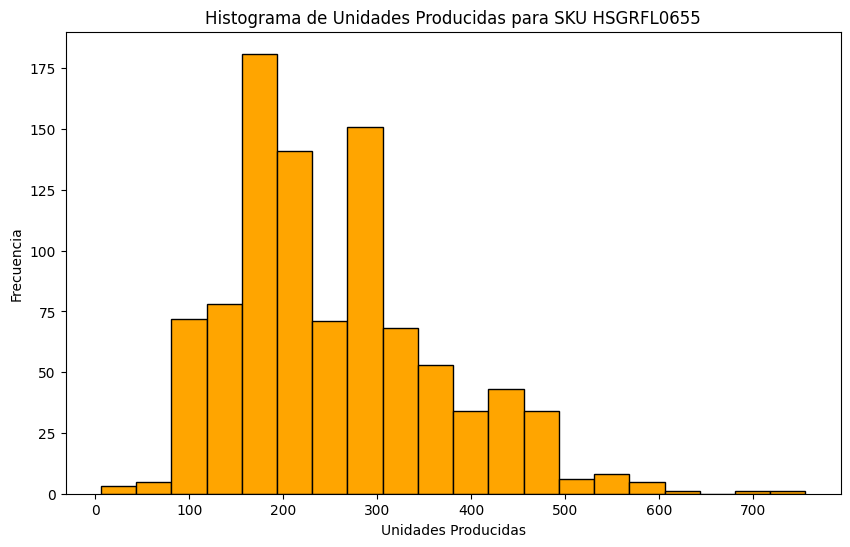

In [38]:
# Histograma para el SKU 'HSGRFL0655'
material_2_data['Total de Producción (Ca)'].plot(kind='hist', bins=20, figsize=(10, 6), color='orange', edgecolor='black')
plt.title('Histograma de Unidades Producidas para SKU HSGRFL0655')
plt.xlabel('Unidades Producidas')
plt.ylabel('Frecuencia')
plt.show()

In [39]:
# Calcular el percentil 80 para el SKU 'HSGRFL0655'
percentil_80_1 = material_2_data['Total de Producción (Ca)'].quantile(0.80)
print(f"Percentil 80 para el SKU HSGRFL0655: {percentil_80_1}")

Percentil 80 para el SKU HSGRFL0655: 328.0


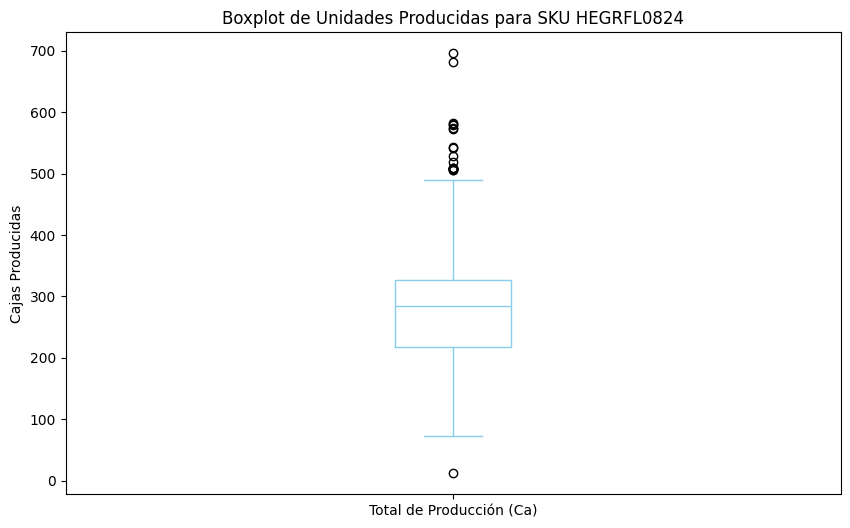

In [40]:
# Boxplot para el SKU 'HEGRFL0824'
material_1_data['Total de Producción (Ca)'].plot(kind='box', figsize=(10, 6), color='skyblue')
plt.title('Boxplot de Unidades Producidas para SKU HEGRFL0824')
plt.ylabel('Cajas Producidas')
plt.show()

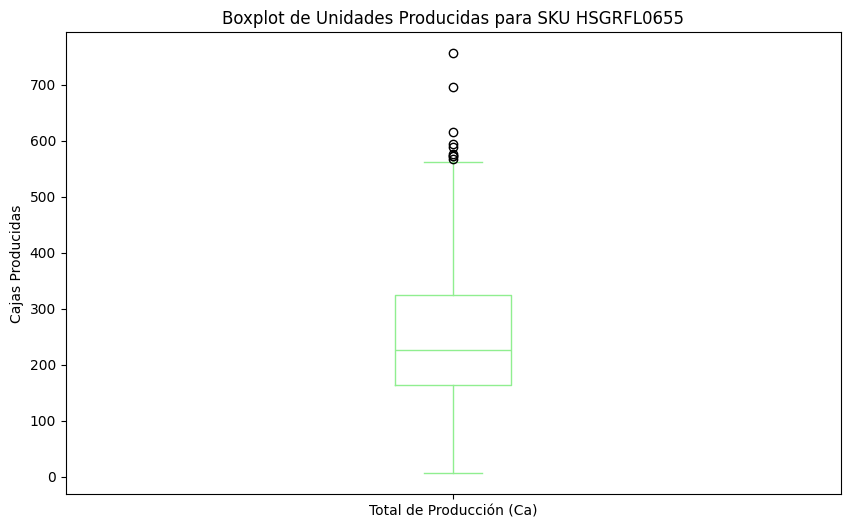

In [41]:
# Boxplot para el SKU 'HSGRFL0655'
material_2_data['Total de Producción (Ca)'].plot(kind='box', figsize=(10, 6), color='lightgreen')
plt.title('Boxplot de Unidades Producidas para SKU HSGRFL0655')
plt.ylabel('Cajas Producidas')
plt.show()

In [42]:
# Calcular el IQR para el SKU 'HEGRFL0824'
Q1 = material_1_data['Total de Producción (Ca)'].quantile(0.25)
Q3 = material_1_data['Total de Producción (Ca)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers_1 = material_1_data[(material_1_data['Total de Producción (Ca)'] < lower_bound) | (material_1_data['Total de Producción (Ca)'] > upper_bound)]
print("Outliers para el SKU HEGRFL0824:")
print(outliers_1)

Outliers para el SKU HEGRFL0824:
              Material  Total Producido (Unidades)  Total de Producción (Ca)  \
Fe.contab.                                                                     
2023-10-23  HEGRFL0824                       91620                     509.0   
2023-10-31  HEGRFL0824                       91440                     508.0   
2023-11-01  HEGRFL0824                       91260                     507.0   
2023-11-02  HEGRFL0824                       93420                     519.0   
2023-11-04  HEGRFL0824                      102960                     572.0   
2023-11-07  HEGRFL0824                      104760                     582.0   
2023-11-08  HEGRFL0824                      122760                     682.0   
2023-11-09  HEGRFL0824                      104580                     581.0   
2023-11-11  HEGRFL0824                      103500                     575.0   
2023-11-17  HEGRFL0824                       91080                     506.0   
2023-11

Para el caso del 824 19 datos forman los outlier y corresponden al último trimestre de 2023. Pero este código tambén tien un outlier por debajo del promedio de producción

In [43]:
# Calcular el IQR para el SKU 'HSGRFL0655'
Q1 = material_2_data['Total de Producción (Ca)'].quantile(0.25)
Q3 = material_2_data['Total de Producción (Ca)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers_2 = material_2_data[(material_2_data['Total de Producción (Ca)'] < lower_bound) | (material_2_data['Total de Producción (Ca)'] > upper_bound)]
print("Outliers para el SKU HSGRFL0655:")
print(outliers_2)

Outliers para el SKU HSGRFL0655:
              Material  Total Producido (Unidades)  Total de Producción (Ca)  \
Fe.contab.                                                                     
2023-10-16  HSGRFL0655                      136080                     567.0   
2023-11-02  HSGRFL0655                      141360                     589.0   
2023-11-07  HSGRFL0655                      137280                     572.0   
2023-11-08  HSGRFL0655                      147840                     616.0   
2023-11-09  HSGRFL0655                      137280                     572.0   
2023-11-11  HSGRFL0655                      167040                     696.0   
2023-11-25  HSGRFL0655                      142560                     594.0   
2023-11-27  HSGRFL0655                      181440                     756.0   
2024-12-07  HSGRFL0655                      138240                     576.0   

            Media Móvil 30 días  
Fe.contab.                       
2023-10-16        

Se refleja númericamente que los outliers corresponden a esos 9 datos correspondientes al último trimestre de 2023. en los cuales los pedidos de producción fuero significativamente altos

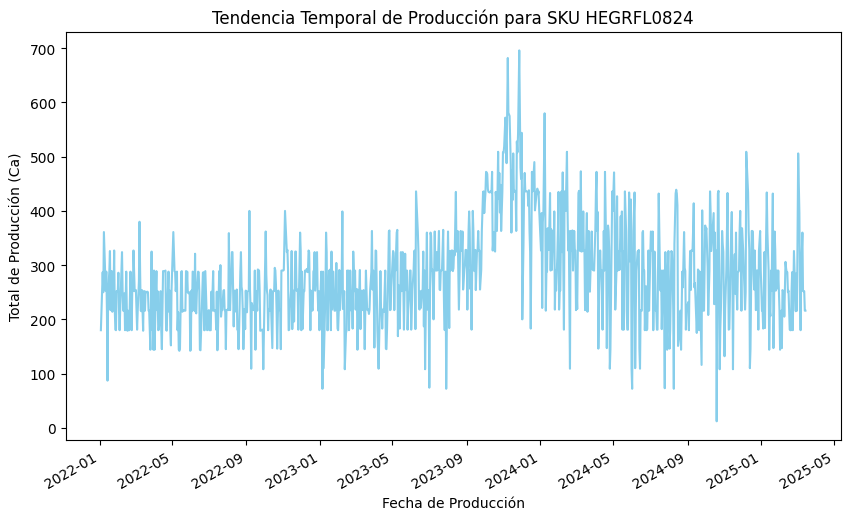

In [65]:

# Agrupar por fecha y obtener la suma de unidades producidas por día
trend_1 = material_1_data.groupby('Fe.contab.')['Total de Producción (Ca)'].sum()

# Graficar la tendencia temporal
trend_1.plot(kind='line', figsize=(10, 6), color='Skyblue')
plt.title('Tendencia Temporal de Producción para SKU HEGRFL0824')
plt.xlabel('Fecha de Producción')
plt.ylabel('Total de Producción (Ca)')
plt.show()

NO hay estacionalidad, pero se obserca una alta variabilidad en todos el tiempo de análisis

<ipython-input-63-3494673416e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  material_2_data['Fe.contab.'] = pd.to_datetime(material_2_data['Fe.contab.'])


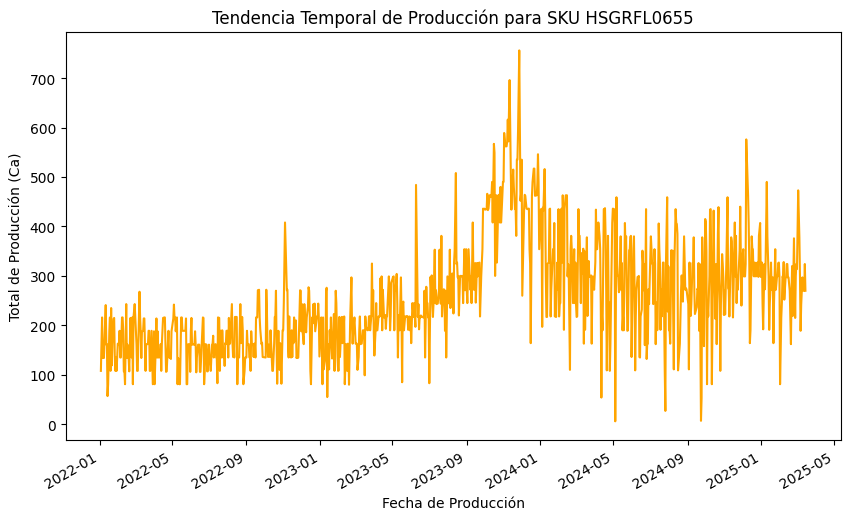

In [63]:
# Asegúrate de que la columna 'Fecha de Producción' esté en formato datetime
material_2_data['Fe.contab.'] = pd.to_datetime(material_2_data['Fe.contab.'])

# Agrupar por fecha y obtener la suma de unidades producidas por día
trend_1 = material_2_data.groupby('Fe.contab.')['Total de Producción (Ca)'].sum()

# Graficar la tendencia temporal
trend_1.plot(kind='line', figsize=(10, 6), color='orange')
plt.title('Tendencia Temporal de Producción para SKU HSGRFL0655')
plt.xlabel('Fecha de Producción')
plt.ylabel('Total de Producción (Ca)')
plt.show()

Este comportamiento refleja que no hay estacionalidad pero si se observan picos interesantes que reflejan una alta variación de las producciones especialmente para el periodo 2024 a 2025


In [67]:
# Conocer la fecha de los datos y el correcto formato de los mismos
data.set_index('Fe.contab.', inplace=True)

# Verificar cómo se ve ahora el índice
print(data.index)

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-08', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2025-03-05', '2025-03-06', '2025-03-07', '2025-03-08',
               '2025-03-10', '2025-03-11', '2025-03-12', '2025-03-13',
               '2025-03-14', '2025-03-15'],
              dtype='datetime64[ns]', name='Fe.contab.', length=1911, freq=None)


Se observa que la data comprende datos desde 03 de enero de 2022 hasta 15 de marzo de 2025


In [82]:
# Establecer la columna de fechas como índice
material_1_data.set_index('Fe.contab.', inplace=True)

# Aplicar la media móvil de 30 días para el SKU 'HEGRFL0824'
material_1_data.loc[:, 'Media Móvil 30 días'] = material_1_data['Total de Producción (Ca)'].rolling(window=30).mean()

# Ver las primeras filas para verificar
print(material_1_data[['Total de Producción (Ca)', 'Media Móvil 30 días']])

            Total de Producción (Ca)  Media Móvil 30 días
Fe.contab.                                               
2022-01-03                     180.0                  NaN
2022-01-04                     216.0                  NaN
2022-01-05                     250.0                  NaN
2022-01-06                     287.0                  NaN
2022-01-07                     250.0                  NaN
...                              ...                  ...
2025-03-11                     252.0           261.933333
2025-03-12                     252.0           265.433333
2025-03-13                     252.0           265.366667
2025-03-14                     216.0           264.166667
2025-03-15                     216.0           262.966667

[955 rows x 2 columns]


<ipython-input-82-7329be26b079>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  material_1_data.loc[:, 'Media Móvil 30 días'] = material_1_data['Total de Producción (Ca)'].rolling(window=30).mean()


Se aplicó para el 824 calculo de una media móvil a 30 días.


In [69]:
# Establecer la columna de fechas como índice
material_2_data.set_index('Fe.contab.', inplace=True)

# Aplicar la media móvil de 30 días para el SKU 'HEGRFL0824'
material_2_data.loc[:, 'Media Móvil 30 días'] = material_2_data['Total de Producción (Ca)'].rolling(window=30).mean()

# Ver las primeras filas para verificar
print(material_2_data[['Total de Producción (Ca)', 'Media Móvil 30 días']])

            Total de Producción (Ca)  Media Móvil 30 días
Fe.contab.                                               
2022-01-03                     108.0                  NaN
2022-01-04                     162.0                  NaN
2022-01-05                     216.0                  NaN
2022-01-06                     134.0                  NaN
2022-01-07                     160.0                  NaN
...                              ...                  ...
2025-03-11                     270.0           289.433333
2025-03-12                     270.0           290.233333
2025-03-13                     270.0           289.266667
2025-03-14                     324.0           290.166667
2025-03-15                     270.0           288.233333

[956 rows x 2 columns]


<ipython-input-69-6644e30dd4b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  material_2_data.loc[:, 'Media Móvil 30 días'] = material_2_data['Total de Producción (Ca)'].rolling(window=30).mean()


Se realiza el mismo cálculo para el 655

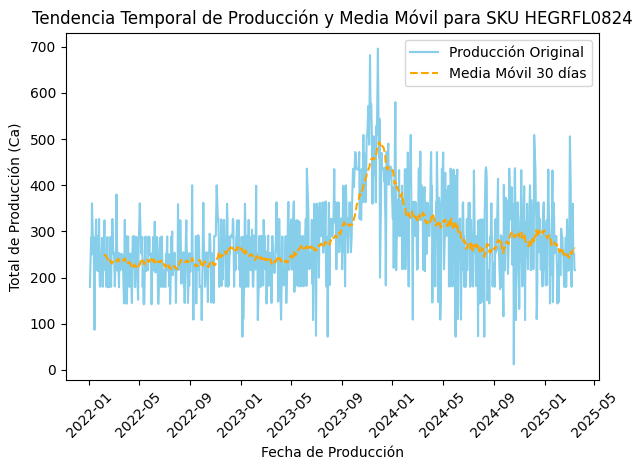

In [26]:
import matplotlib.pyplot as plt

# Graficar la producción original
plt.plot(material_1_data.index, material_1_data['Total de Producción (Ca)'], label='Producción Original', color='skyblue')

# Graficar la media móvil de 30 días
plt.plot(material_1_data.index, material_1_data['Media Móvil 30 días'], label='Media Móvil 30 días', color='orange', linestyle='--')

# Agregar título, etiquetas y leyenda
plt.title('Tendencia Temporal de Producción y Media Móvil para SKU HEGRFL0824')
plt.xlabel('Fecha de Producción')
plt.ylabel('Total de Producción (Ca)')
plt.legend()

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las fechas si es necesario
plt.tight_layout()
plt.show()

Con la ayuda del pr

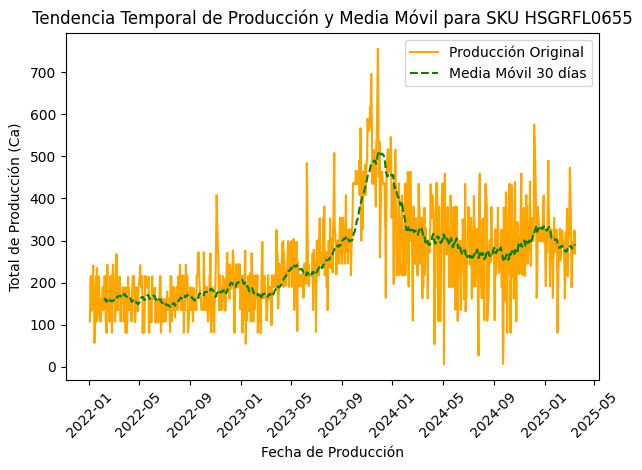

In [30]:
import matplotlib.pyplot as plt

# Graficar la producción original
plt.plot(material_2_data.index, material_2_data['Total de Producción (Ca)'], label='Producción Original', color='orange')

# Graficar la media móvil de 30 días
plt.plot(material_2_data.index, material_2_data['Media Móvil 30 días'], label='Media Móvil 30 días', color='green', linestyle='--')

# Agregar título, etiquetas y leyenda
plt.title('Tendencia Temporal de Producción y Media Móvil para SKU HSGRFL0655')
plt.xlabel('Fecha de Producción')
plt.ylabel('Total de Producción (Ca)')
plt.legend()

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las fechas si es necesario
plt.tight_layout()
plt.show()